In [1]:
from IPython.display import Image
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<a id="top"></a>
# **Section Calculation**

## Assumption

**This is an exercise for calculating the new geometry of the test setup section based on the 1000 kN machine available in the laboratory:**  
1. The concrete and steel behave linearly.  
2. Load distribution is uniform across the cross-section.  
3. Concrete cover is 40 mm  

<img src="new-geo.png" alt="New Geometry" style="width:20cm;">

## Formulation:


Let the unknown variables be:

- $D_{in}$: Inner diameter
- $D_{ou}$: Outer diameter

Let the known variables be:
- $\phi $ : Rebar diameter {mm}
- $N_\phi $: Number of the rebars
- $E_{Con} $: Modulus of elasticity of concrete in GPa
- $E_{St} $: Modulus of elasticity of steel in GPa
- $N_{tot} $: Applying force in N
- $\sigma_{max} $: Concrete grade in MPa
- $ D_{ou} - D_{in} = 120 $

### Calculation of Inner Diameter:



### Model to Calculate $D_{in}$

To calculate the inner diameter $D_{in}$, we can use the following relationship derived from the assumptions and given parameters:

1. The total force $N_{tot}$ is distributed between the concrete and steel:
    $$
    N_{tot} = N_{con} + N_{st}
    $$

2. The force in concrete $N_{con}$ and steel $N_{st}$ can be expressed as:
    $$
    N_{con} = \sigma_{max} \cdot A_{con}
    $$
    $$
    N_{st} = n \cdot \sigma_{max} \cdot A_{st}
    $$

3. The areas of concrete and steel are:
    $$
    A_{con} = A_{tot} - A_{st}
    $$
    $$
    A_{tot} = \frac{\pi}{4} \cdot (D_{ou}^2 - D_{in}^2)
    $$
    $$
    A_{st} = N_\phi \cdot \frac{\pi}{4} \cdot \phi^2
    $$

4. Substituting these into the force equation:
    $$
    N_{tot} = \sigma_{max} \cdot (A_{tot} - A_{st}) + n \cdot \sigma_{max} \cdot A_{st}
    $$

5. Simplify to solve for $D_{in}$:
    $$
    N_{tot} = \sigma_{max} \cdot \left[\frac{\pi}{4} \cdot (D_{ou}^2 - D_{in}^2) - A_{st}\right] + n \cdot \sigma_{max} \cdot A_{st}
    $$

This equation can be solved numerically to find $D_{in}$.

In [2]:
# Input known variables
phi = 12 # Number of the rebars
N_phi = 4 # Number of rebars
E_Con = 10 # Modulus of elasticity of concrete
E_St = 100 # Modulus of elasticity of steel
N_tot = 1000000 # Applying force
sigma_max = 25 # Concrete grade
n = E_St / E_Con # Ratio of elastic moduli
delta_D = 120 # Ring layer thikness

In [3]:
# Define the symbols
D_in = sp.Symbol('D_in')  # Inner diameter
D_ou = D_in + delta_D  # Outer diameter

# Calculate A_st (area of steel)
A_st = N_phi * (sp.pi / 4) * phi**2

# Calculate A_tot (total area)
A_tot = (sp.pi / 4) * (D_ou**2 - D_in**2)

# Calculate A_con (area of concrete)
A_con = A_tot - A_st

# Force equation
force_eq = sp.Eq(N_tot, sigma_max * (A_con) + n * sigma_max * A_st)

# Solve for D_in
D_in_solution = sp.solve(force_eq, D_in)

# Display the solution
D_in_solution, D_ou.subs(D_in, D_in_solution[0])

([130.606590789194], 250.606590789194)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


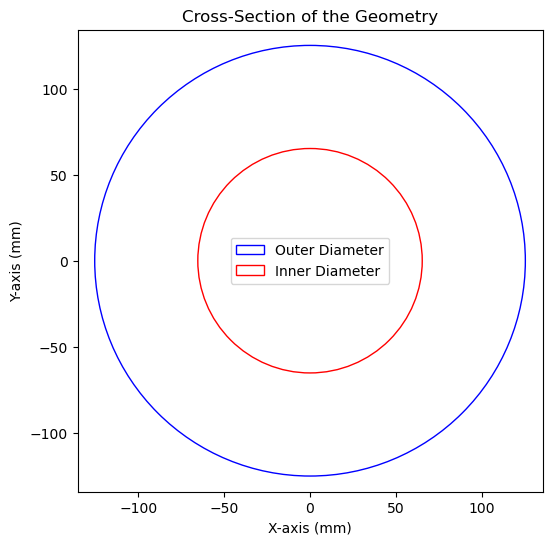

In [4]:
# Extract the numerical values of D_in and D_ou
D_in_value = float(D_in_solution[0])
D_ou_value = float(D_ou.subs(D_in, D_in_value))

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 6))

# Draw the outer circle
outer_circle = plt.Circle((0, 0), D_ou_value / 2, color='blue', fill=False, label='Outer Diameter')

# Draw the inner circle
inner_circle = plt.Circle((0, 0), D_in_value / 2, color='red', fill=False, label='Inner Diameter')

# Add the circles to the plot
ax.add_artist(outer_circle)
ax.add_artist(inner_circle)

# Set the aspect ratio to be equal
ax.set_aspect('equal', adjustable='datalim')

# Set limits
ax.set_xlim(-D_ou_value / 2 - 10, D_ou_value / 2 + 10)
ax.set_ylim(-D_ou_value / 2 - 10, D_ou_value / 2 + 10)

# Add labels and legend
ax.set_title("Cross-Section of the Geometry")
ax.set_xlabel("X-axis (mm)")
ax.set_ylabel("Y-axis (mm)")
ax.legend()

# Show the plot
plt.show()
